**Run the following two cells before you begin.**

In [2]:
%autosave 10

Autosaving every 10 seconds


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [4]:
# Import the data set
df = pd.read_csv('cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [5]:
# Define the sigmoid function
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))
     

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [6]:
X=df[['LIMIT_BAL','PAY_1']]
y=df['default payment next month']

In [7]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
y=np.asarray(y)

In [8]:
# Create a train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [9]:
from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression(solver='liblinear')

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [10]:
# Fit the logistic regression model on training data
log_regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# Make predictions using `.predict()`
y_pred_test = log_regressor.predict(X_test)
y_pred_test

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [12]:
# Find class probabilities using `.predict_proba()`
y_pred_prob_test = log_regressor.predict_proba(X_test)
y_pred_prob_test

array([[0.49664996, 0.50335004],
       [0.62382022, 0.37617978],
       [0.89839926, 0.10160074],
       ...,
       [0.87235885, 0.12764115],
       [0.69315222, 0.30684778],
       [0.47092419, 0.52907581]])

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [13]:
# Add column of 1s to features
add_1s = np.hstack([np.ones((X_test.shape[0],1)), X_test])
add_1s

array([[ 1.        , -0.06099227,  1.79079692],
       [ 1.        , -0.90820828,  0.90328699],
       [ 1.        ,  0.24708627, -0.87173286],
       ...,
       [ 1.        , -0.90820828, -0.87173286],
       [ 1.        ,  0.47814518,  0.90328699],
       [ 1.        , -0.52311009,  1.79079692]])

In [14]:
# Get coefficients and intercepts from trained model
print('Intercept: ',log_regressor.intercept_)
print('Coefficient: ',log_regressor.coef_)

Intercept:  [-1.42896919]
Coefficient:  [[-0.22296102  0.79784068]]


In [15]:
# Combining both intercept and coefficients
intercept_coef = np.concatenate([log_regressor.intercept_.reshape(1,1),log_regressor.coef_], axis=1)
intercept_coef

array([[-1.42896919, -0.22296102,  0.79784068]])

In [16]:
X_lin_comb = np.dot(intercept_coef, np.transpose(add_1s))
X_lin_comb

array([[ 0.01340035, -0.50579503, -2.17956374, ..., -1.92197808,
        -0.81489782,  0.11643461]])

In [17]:
# Manually calculate predicted probabilities
y_pred_prob_manual = sigmoid(X_lin_comb)
y_pred_prob_manual = y_pred_prob_manual.reshape(5333,1)
y_pred_prob_manual

array([[0.50335004],
       [0.37617978],
       [0.10160074],
       ...,
       [0.12764115],
       [0.30684778],
       [0.52907581]])

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [18]:
# Manually calculate predicted classes
y_pred_manual = (y_pred_prob_manual >= 0.5)
y_pred_manual.astype(int)

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [19]:
# Compare to scikit-learn's predicted classes
y_pred_test

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

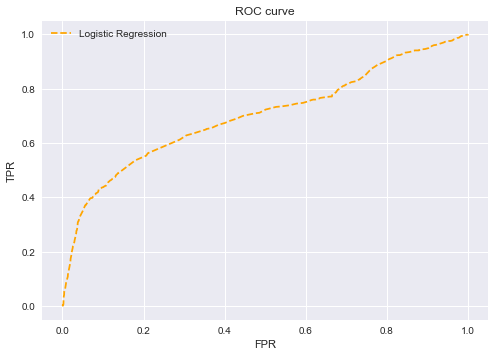

In [25]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
# Use scikit-learn's predicted probabilities to calculate ROC AUC
# Use scikit-learn's predicted probabilities to calculate ROC AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresh = roc_curve(y_test, y_pred_prob_test[:,1], pos_label=1)
auc_score = roc_auc_score(y_test, y_pred_prob_test[:,1])

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
# title
plt.title('ROC curve')
# x label
plt.xlabel('FPR')
# y label
plt.ylabel('TPR')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [21]:
auc_score

0.7014549516224959

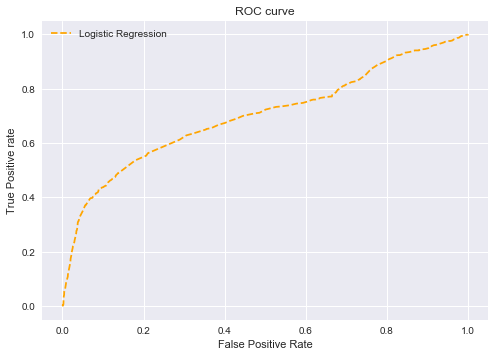

In [23]:
# Use manually calculated predicted probabilities to calculate ROC AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresh = roc_curve(y_test, y_pred_prob_manual) #pos_label=1)
auc_score = roc_auc_score(y_test, y_pred_prob_manual)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [109]:
auc_score

0.7014549516224959